In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib import pylab as pl
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize
from scipy.interpolate import interp2d
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/var/folders/68/y4rdzskn3911g1y9ls2qn0ch0000gq/T/ipykernel_3054/1492553222.py:31: UserWarning: The following kwargs were not used by contour: 'lw'
  ax2.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),


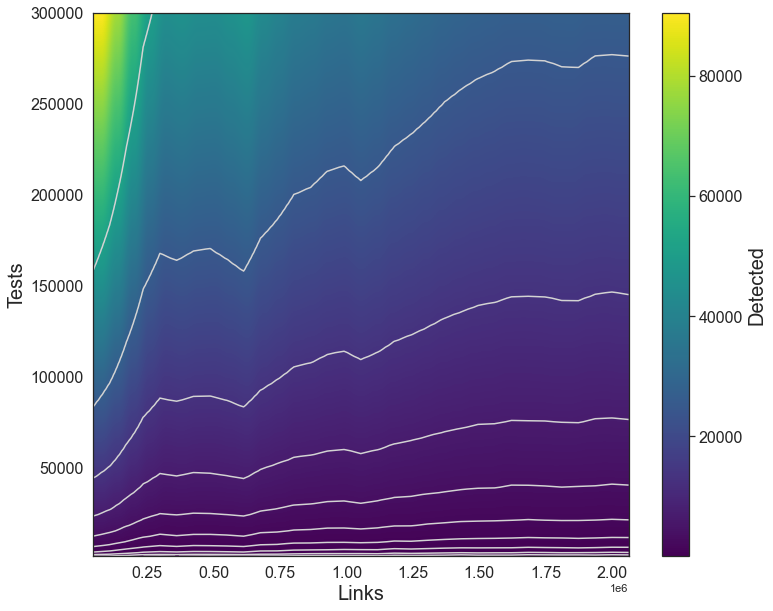

In [4]:
# MAPA DE CALOR: DOS FORMAS
name = 'bogota'
sns.set_theme(style="white")

fig, ax2 = plt.subplots(1, 1, figsize=(12, 10))
betastr = '3,0'
heatmap = pd.read_csv('tests/out/' + name + '_beta_' + betastr +
                        '.txt', sep='\t', names=['links', 'tests', 'detected', 'error'])
# PIVOT TABLE
x = heatmap['links'].to_numpy()
y = heatmap['tests'].to_numpy()
z = heatmap['detected'].to_numpy()

colormap = 'viridis'

# Niveles para hacer líneas de contorno blancas (en escala logaritmica)
# np.floor(np.log10(z.min())-4),
lev_exp = np.linspace(np.log10(z.min()+0.00000001), np.log10(z.max()), 12)
# np.ceil(np.log10(z.max())+4), 4)
levs = np.power(10.0, lev_exp)

lev_exp_contour = lev_exp
levs_contour = np.power(10.0, lev_exp_contour)

shape_x = len(np.unique(x))
shape_y = len(np.unique(y))

# imshow para dibujar simplemente el mapa, sin marcar contornos
ax2.imshow(np.flip(z.reshape(shape_x, shape_y), 1).transpose(), extent=(x.min(), x.max(), y.min(), y.max()), aspect='auto',
            cmap=colormap, norm=Normalize(levs.min()+0.01, levs.max()))  # , norm=LogNorm(levs.min(),levs.max()))
ax2.contour(z.reshape(shape_x, shape_y).transpose(), levels=levs_contour, extent=(x.min(), x.max(), y.min(), y.max()),
            norm=Normalize(levs.min()+0.01, levs.max()), colors='lightgrey', lw=2)  # , norm=LogNorm(levs.min(),levs.max()))

# COLORBAR
sm = plt.cm.ScalarMappable(cmap=colormap, norm=Normalize(vmin=min(levs), vmax=max(levs)))
#sm.set_array([])
cbar2 = fig.colorbar(sm, ax=ax2)

ax2.set_xlabel('Links', size=20)
ax2.set_ylabel('Tests', size=20)
ax2.tick_params(labelsize=16)

cbar2.ax.tick_params(labelsize=16)
cbar2.ax.set_ylabel('Detected', size=20)

plt.savefig('figures/tests/' + name + '_beta_' + betastr + '.pdf', dpi=150, bbox_inches="tight")